In [1]:
import pandas as pd
df_git = pd.read_csv("Github_survey_r2.csv",low_memory=False)
column_headers = list(df_git.columns.values)
b=len(column_headers)
print("Number of attributes =  ", b)


Number of attributes =   93


In [2]:
# adding FINAL BEHAVIOUR column to dataset
df_git['Behaviour'] = None

# Removing rows with STATUS attribute value PARTIAL
df_git.drop(df_git[df_git['STATUS'] == 'Partial'].index, inplace = True)

print("total Records after removing partial status rows from dataset = ", len(df_git))
df_git['Behaviour'] = df_git['Behaviour'].fillna(0)



# Putting value '1' if any of 2 of most important behaviour attribures is YES

df_git.loc[(df_git['DISCOURAGING_BEHAVIOR_BAD_DOCS'] == 'Yes') & (df_git['DISCOURAGING_BEHAVIOR_LACK_OF_RESPONSE'] == 'Yes') ,'Behaviour'] = 1
print(df_git['Behaviour'].value_counts())


total Records after removing partial status rows from dataset =  3746
1    2846
0     900
Name: Behaviour, dtype: int64


In [3]:
# finding % of missing values per attribute in complete records

column_headers = list(df_git.columns.values)
b=len(df_git)
j=1
for x in column_headers:
    a= df_git[x].isna().sum()
    temp= round((a/b)*100,2)
    if temp >= 40:
        print(j," Missing Values in  ", x, " is ", temp , " %" )
        j=j+1
print("\n==================\n")

#Removing these high NA percentage attributes from dataset

df_git.drop(['OSS_AS_JOB', 'EMPLOYER_POLICY_DEPENDENCIES', 'OSS_HIRING','MINORITY_HOMECOUNTRY','OFF_SITE_ID'], axis=1, inplace=True)
column_headers = list(df_git.columns.values)
b=len(column_headers)
print("Number of attributes after droping above attributes =  ", b)

# removing 6 behaviour attributes
df_git.drop(['DISCOURAGING_BEHAVIOR_LACK_OF_RESPONSE', 'DISCOURAGING_BEHAVIOR_REJECTION_WOUT_EXPLANATION', 
             'DISCOURAGING_BEHAVIOR_DISMISSIVE_RESPONSE','DISCOURAGING_BEHAVIOR_BAD_DOCS',
             'DISCOURAGING_BEHAVIOR_CONFLICT','DISCOURAGING_BEHAVIOR_UNWELCOMING_LANGUAGE'], axis=1, inplace=True)

column_headers = list(df_git.columns.values)
b=len(column_headers)
print("Number of attributes after droping 6 Behaviour attributes =  ", b)

1  Missing Values in   OSS_AS_JOB  is  45.94  %
2  Missing Values in   EMPLOYER_POLICY_DEPENDENCIES  is  41.24  %
3  Missing Values in   OSS_HIRING  is  46.02  %
4  Missing Values in   MINORITY_HOMECOUNTRY  is  74.59  %
5  Missing Values in   OFF_SITE_ID  is  88.15  %


Number of attributes after droping above attributes =   89
Number of attributes after droping 6 Behaviour attributes =   83


In [4]:
# deleting some not useful attributes
str='Attributes like status- as all completed records are used, translate, date submitted have no relation\nto the desired behaviour attribute as all values are same'  
print(str)
# deleting above stated attributes
df_git.drop(['DATE_SUBMITTED', 'STATUS','TRANSLATED'], axis=1, inplace=True)

column_headers = list(df_git.columns.values)
b=len(column_headers)
print("Number of attributes after droping 6 Behaviour attributes =  ", b)

Attributes like status- as all completed records are used, translate, date submitted have no relation
to the desired behaviour attribute as all values are same
Number of attributes after droping 6 Behaviour attributes =   80


In [5]:
decision_df = df_git.copy(deep=True)
x1 = list(decision_df.columns.values)
# converting following attributes to Ranks as all values are ordinal categoris
print('Following attributes have same ordinal data i.e. Nan, Never, Rarely, Occationaly & Freqently')
#print(x1[6:12])
print('replacing this ordinal data to RANK as Nan, Never=0, Rarely=1, Occationaly=2 & Freqently=3')

step=6

Ranking = {"Never":0, "Rarely":1, "Occasionally":2 , "Frequently":3}

for i in range (6):
    print('\n')
    print('ATTRIBUTE = ', x1[i+step])
    print('\n')
    count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    
    Ranking_df = pd.DataFrame(index=[],columns=['Original Options       |  ','    Rank  |  ','Count  |'])
    
    q = decision_df[x1[i+step]].unique()
    q=q.astype('str')
    q=sorted(q)
    
    for j in range (len(q)):
        Ranking_df.at[j,'Original Options       |  ']= q[j]
    
    # Replacing with Ranks
    decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
    
    # Again counting unique attribute values based on Ranks
    
    count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count_1)
    #print('------')
    #print(count_1.index[len(q)-1])
    c_2=list(count_1)
    
    for j in range (len(q)):
        if(Ranking_df._get_value(j, 'Original Options       |  ') == q[j]):
            Ranking_df.at[j,'    Rank  |  ']= Ranking.get(q[j])
    
    for j in range (len(q)):
        for k in range (len(q)-1):
            if(Ranking_df._get_value(j, '    Rank  |  ') == k):
                Ranking_df.at[j,'Count  |']= count_1[k]
    Ranking_df.at[len(q)-1,'Count  |']= c_2[len(q)-1]   
    
    
    print(Ranking_df)
    del Ranking_df

Following attributes have same ordinal data i.e. Nan, Never, Rarely, Occationaly & Freqently
replacing this ordinal data to RANK as Nan, Never=0, Rarely=1, Occationaly=2 & Freqently=3


ATTRIBUTE =  CONTRIBUTOR_TYPE_CONTRIBUTE_CODE


  Original Options       |       Rank  |   Count  |
0                 Frequently             3      847
1                      Never             0      138
2               Occasionally             2      902
3                     Rarely             1      877
4                        nan          None      982


ATTRIBUTE =  CONTRIBUTOR_TYPE_CONTRIBUTE_DOCS


  Original Options       |       Rank  |   Count  |
0                 Frequently             3      349
1                      Never             0      422
2               Occasionally             2      857
3                     Rarely             1     1123
4                        nan          None      995


ATTRIBUTE =  CONTRIBUTOR_TYPE_PROJECT_MAINTENANCE


  Original Options       |       Rank 

In [6]:
# converting Employment attributes to Encoding as all values are nominal categoris
print('Following attributes are the nominal data i.e. Temporarily not working, Retired or permanently not working , Full time student,  Employed part time, Employed full time & Nan')

print('replacing this nominal data to Dummy Encoding')

#encode the data


from sklearn.preprocessing import LabelEncoder

#emp column added with encoded values
    # https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db

decision_df['emp'] = LabelEncoder().fit_transform(decision_df['EMPLOYMENT_STATUS'])

#deleting EMPLOYMENT_STATUS column

decision_df.drop(['EMPLOYMENT_STATUS'], axis=1, inplace=True)
#xx1 = list(decision_df.columns.values)
#print(xx1)

#renaming emp back to EMPLOYMENT_STATUS

decision_df.rename(columns = {'emp':'EMPLOYMENT_STATUS'}, inplace = True)

#xx1 = list(decision_df.columns.values)
#print('============')
#print(xx1)

# shift column 'EMPLOYMENT_STATUS' to its original pos
emp_column = decision_df.pop('EMPLOYMENT_STATUS')
decision_df.insert(12, 'EMPLOYMENT_STATUS', emp_column)
xx1 = list(decision_df.columns.values)
#print('============')
#print(xx1)

# converting following attribute to Ranks as all values are ordinal categoris
#print('Following attributes have ordinal data i.e. Nan, Never, Rarely, Occationaly & Freqently')
#print(x1[13:16])
#print('replacing this ordinal data to RANK as Nan, Never=0, Rarely=1, Occationaly=2 & Freqently=3')
x1= list(decision_df.columns.values)
step=13
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"Never":0, "Rarely":1, "Occasionally":2 , "Frequently":3}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)

step=14
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"Not at all interested":0, "Not too interested":1, "Somewhat interested":2 , "Very interested":3}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)

step=15
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"Very unlikely":0, "Somewhat unlikely":1, "Somewhat likely":2 , "Very likely":3}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)

#print('Following attributes have same ordinal data i.e. Nan, Never, Rarely, Occationaly & Freqently')
#print(x1[6:12])
#print('replacing this ordinal data to RANK as Nan, Never=0, Rarely=1, Occationaly=2 & Freqently=3')

step=16

Ranking = {"Very important to have":3, "Very important not to have":3, "Somewhat important to have":2 , "Somewhat important not to have":2 , "Not important either way":1 , "Don't know what this is":0}


for i in range (16):
    #print('\n')
    #print('ATTRIBUTE = ', x1[i+step])
    #print('\n')
    count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count)
   
    # Replacing with Ranks
    decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
    
    # Again counting unique attribute values based on Ranks
    
    count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count_1)
    #print('------')


step=32
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"Always":3, "Sometimes":2, "Rarely":1 , "Never":0}
# Replacing with Ranks
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
# Again counting unique attribute values based on Ranks
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count_1)

print('many attributes are ranked')

step=33
i=0
Ranking = {"Generally harder to use":2, "About the same":1, "Generally easier to use":0}

print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
del count
   
# Replacing with Ranks
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
    
# Again counting unique attribute values based on Ranks    
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)
del count_1


step=34
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)

print(count)
Ranking = {"Generally more secure":2,"About the same":1,"Generally less secure":0}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)


step=35
i=0
Ranking = {"Generally more stable":2, "About the same":1, "Generally less stable":0}

print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

   
# Replacing with Ranks
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
    
# Again counting unique attribute values based on Ranks    
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

Ranking = {"Strongly disagree":0, "Somewhat disagree":1, "Neither agree nor disagree":2 , "Somewhat agree":3 , "Strongly agree":4}
step= 36
for i in range (3):
    #print('\n')
    #print('ATTRIBUTE = ', x1[i+step])
    #print('\n')
    count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count)
    #Replacing with Ranks
    decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
    
    # Again counting unique attribute values based on Ranks
    
    count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count_1)
    #print('******')


step=39
Ranking = {"Not at all important":0, "Slightly important":1, "Moderately important":2 , "Very important":3 , "Extremely important":4}
for i in range (11):
    #print('\n')
    #print('ATTRIBUTE = ', x1[i+step])
    #print('\n')
    count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count)
    #Replacing with Ranks
    decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
    count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count_1)
    #print('******')

step = 50
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"Records of authorship should be required so that end users know who created the source code they are working with.":1, "People should be able to contribute code without attribution, if they wish to remain anonymous.":0}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count_1)

step = 51
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"No information at all about me":0, "A little information about me":1, "Some information about me":2 , "A lot of information about me":3 }
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count_1)

step = 52
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"No":0, "Yes":1 }
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count_1)


step = 53
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"I don't publish this kind of content online.":0, "I take precautions to use different pseudonymns on different platforms.":1 , "I usually use a consistent pseudonym that is not linked anywhere with my real name online.":2 , "I usually use a consistent pseudonym that is easily linked to my real name online.":3 , "I include my real name.":4 }
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count_1)
print('ranking or encoding done till attribute 53')

step = 54
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
#count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
count = decision_df[x1[i+step]].unique()
print(count)
Ranking = {"I include my real name.":3,"I usually contribute using a consistent pseudonym that is not linked anywhere with my real name online. ":1 , "I usually contribute using a consistent pseudonym that is easily linked to my real name online.":2 , "I take precautions to use different usernames  in different projects.":0  }

decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 55
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"No":0, "Yes":1 }
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

# now this is a categorical attribute and not a ordinal attribute
# hence 
step = 56
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

decision_df['helper'] = LabelEncoder().fit_transform(decision_df[x1[i+step]])

#deleting FIND_HELPER column

decision_df.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to FIND_HELPER

decision_df.rename(columns = {'helper':'FIND_HELPER'}, inplace = True)

# shift column 'FIND_HELPER' to its original pos
help_column = decision_df.pop('FIND_HELPER')
decision_df.insert(56, 'FIND_HELPER', help_column)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 57
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Total strangers, I didn't know of them previously.":0, "I knew of them through their contributions to projects, but didn't know them personally.":1, "We knew each other a little.":2 ,"We knew each other well.":3}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)
print('ranking or encoding done till attribute 57')

step = 58
i=0
# a categorical attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
#
decision_df['xx'] = LabelEncoder().fit_transform(decision_df[x1[i+step]])
#deleting RECEIVED_HELP_TYPE column

decision_df.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to FIND_HELPER

decision_df.rename(columns = {'xx':'RECEIVED_HELP_TYPE'}, inplace = True)

# shift column 'RECEIVED_HELP_TYPE' to its original pos
help_column = decision_df.pop('RECEIVED_HELP_TYPE')
decision_df.insert(58, 'RECEIVED_HELP_TYPE', help_column)
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 59
i=0
# a Simple attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

Ranking = {"No":0, "Yes":1 }
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)


step = 60
i=0
# a categorical attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

decision_df['xx'] = LabelEncoder().fit_transform(decision_df[x1[i+step]])

#deleting FIND_HELPEE column

decision_df.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to FIND_HELPER

decision_df.rename(columns = {'xx':'FIND_HELPEE'}, inplace = True)

# shift column 'FIND_HELPEE' to its original pos
help_column = decision_df.pop('FIND_HELPEE')
decision_df.insert(60, 'FIND_HELPEE', help_column)
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)


step = 61
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

Ranking = {"We knew each other well.":3, "We knew each other  a little.":2 , "Total strangers, I didn't know of them previously.":0, "I knew of them through their contributions to projects, but didn't know them personally.":0}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)


step = 62
i=0
# a categorical attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

decision_df['xx'] = LabelEncoder().fit_transform(decision_df[x1[i+step]])

#deleting PROVIDED_HELP_TYPE column

decision_df.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to PROVIDED_HELP_TYPE

decision_df.rename(columns = {'xx':'PROVIDED_HELP_TYPE'}, inplace = True)

# shift column 'PROVIDED_HELP_TYPE' to its original pos
help_column = decision_df.pop('PROVIDED_HELP_TYPE')
decision_df.insert(62, 'PROVIDED_HELP_TYPE', help_column)
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

# # MAKING COPY OF WORKING DATAFRAME

decision_df2 = decision_df.copy(deep=True)

print('last remaining attributes ranking and encoding')
step = 63
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Frequently":3, "Sometimes":2 , "Rarely":1, "Never":0}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 64
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"I am free to contribute without asking for permission.":3, "I am permitted to contribute to open source, but need to ask for permission.":2 , "Not applicable":1, "I'm not sure.":1, "My employer doesn't have a clear policy on this.":1, "I am not permitted to contribute to open source at all.":0}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 65
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Use of open source applications is encouraged.":2,"Use of open source applications is acceptable if it is the most appropriate tool.":2, "Use of open source applications is rarely, if ever, permitted.":1 , "Not applicable":0, "My employer doesn't have a clear policy on this.":0, "I'm not sure.":0}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 66
i=0
# a categorical attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

decision_df2['xx'] = LabelEncoder().fit_transform(decision_df2[x1[i+step]])

#deleting IMMIGRATION column

decision_df2.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to IMMIGRATION

decision_df2.rename(columns = {'xx':'IMMIGRATION'}, inplace = True)

# shift column 'IMMIGRATION' to its original pos
help_column = decision_df2.pop('IMMIGRATION')
decision_df2.insert(66, 'IMMIGRATION', help_column)
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)


step = 67
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Yes":2,"Prefer not to say":1, "Not sure":1 ,"No":0}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 68
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Man":2,"Woman":1, "Non-binary  or Other":0 ,"Prefer not to say":0}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 69
i=0
# a categorical attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

decision_df2['xx'] = LabelEncoder().fit_transform(decision_df2[x1[i+step]])

#deleting TRANSGENDER_IDENTITY column

decision_df2.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to TRANSGENDER_IDENTITY

decision_df2.rename(columns = {'xx':'TRANSGENDER_IDENTITY'}, inplace = True)

# shift column 'TRANSGENDER_IDENTITY' to its original pos
help_column = decision_df2.pop('TRANSGENDER_IDENTITY')
decision_df2.insert(69, 'TRANSGENDER_IDENTITY', help_column)
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 70
i=0
# a categorical attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
decision_df2['xx'] = LabelEncoder().fit_transform(decision_df2[x1[i+step]])
#deleting SEXUAL_ORIENTATION column

decision_df2.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to SEXUAL_ORIENTATION

decision_df2.rename(columns = {'xx':'SEXUAL_ORIENTATION'}, inplace = True)

# shift column 'SEXUAL_ORIENTATION' to its original pos
help_column = decision_df2.pop('SEXUAL_ORIENTATION')
decision_df2.insert(70, 'SEXUAL_ORIENTATION', help_column)
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 71
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Not at all":0,"Not very well":1, "Moderately well":2 ,"Very well":3}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 72
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"17 or younger":0,"18 to 24 years":1, "25 to 34 years":2 ,"35 to 44 years":3 ,"45 to 54 years":4,"55 to 64 years":5 ,"65 years or older":6}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 73
for i in range (2):
    print('\n')
    print('ATTRIBUTE = ', x1[i+step])
    print('\n')
    count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    print(count)
    Ranking = {"Less than secondary (high) school":0,"Secondary (high) school graduate or equivalent":1, "Some college, no degree":2 ,"Vocational/trade program or apprenticeship":3 ,"Bachelor's degree":4,"Master's degree":5 ,"Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)":6}
    decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
    count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    print(count_1)

step = 75
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Younger than 13 years old":0,"13 - 17 years old":1,"18 - 24 years old":1, "25 - 45 years old":1 ,"Older than 45 years old":2}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

# attribute LOCATION_OF_FIRST_COMPUTER_INTERNET is categorical attribute
step = 76
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

decision_df2['xx'] = LabelEncoder().fit_transform(decision_df2[x1[i+step]])

#deleting LOCATION_OF_FIRST_COMPUTER_INTERNET column

decision_df2.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to LOCATION_OF_FIRST_COMPUTER_INTERNET

decision_df2.rename(columns = {'xx':'LOCATION_OF_FIRST_COMPUTER_INTERNET'}, inplace = True)

# shift column 'IMMIGRATION' to its original pos
help_column = decision_df2.pop('LOCATION_OF_FIRST_COMPUTER_INTERNET')
decision_df2.insert(76, 'LOCATION_OF_FIRST_COMPUTER_INTERNET', help_column)
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 77
i=0
#attribute PARTICIPATION_TYPE_ANY_REPONSE has mainly same value of 1 hence drop
x1 = list(decision_df.columns.values)
print('header len' , len(x1))
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
if(x1[i+step] == 'PARTICIPATION_TYPE_ANY_REPONSE'):
    decision_df2.drop([x1[i+step]], axis=1, inplace=True)
x1 = list(decision_df2.columns.values)
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
print('header len' , len(x1))



count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"github":1,"off site community":0}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

Following attributes are the nominal data i.e. Temporarily not working, Retired or permanently not working , Full time student,  Employed part time, Employed full time & Nan
replacing this nominal data to Dummy Encoding
many attributes are ranked


ATTRIBUTE =  OSS_UX


Generally harder to use     733
Generally easier to use    1288
About the same             1704
NaN                          21
Name: OSS_UX, dtype: int64
2.0     733
1.0    1704
0.0    1288
NaN      21
Name: OSS_UX, dtype: int64


ATTRIBUTE =  OSS_SECURITY


Generally more secure    2273
Generally less secure     203
About the same           1253
NaN                        17
Name: OSS_SECURITY, dtype: int64
2.0    2273
1.0    1253
0.0     203
NaN      17
Name: OSS_SECURITY, dtype: int64


ATTRIBUTE =  OSS_STABILITY


Generally more stable    1166
Generally less stable     693
About the same           1862
NaN                        25
Name: OSS_STABILITY, dtype: int64
2.0    1166
1.0    1862
0.0     693
NaN      25
Na

Name: AGE, dtype: int64
6.0      36
5.0      93
4.0     267
3.0     772
2.0    1398
1.0     870
0.0     138
NaN     172
Name: AGE, dtype: int64


ATTRIBUTE =  FORMAL_EDUCATION


Vocational/trade program or apprenticeship                       127
Some college, no degree                                          640
Secondary (high) school graduate or equivalent                   375
Master's degree                                                  851
Less than secondary (high) school                                126
Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)     256
Bachelor's degree                                               1317
NaN                                                               54
Name: FORMAL_EDUCATION, dtype: int64
6.0     256
5.0     851
4.0    1317
3.0     127
2.0     640
1.0     375
0.0     126
NaN      54
Name: FORMAL_EDUCATION, dtype: int64


ATTRIBUTE =  PARENTS_FORMAL_EDUCATION


Vocational/trade program or apprenticeship                

In [7]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.impute import MissingIndicator

# making copy of the dataframe to work
decision_df3 = decision_df2.copy(deep=True)

# filling all Nan values with -1
decision_df3=decision_df3.fillna(-1)
decision_df3.to_csv('C:/Users/Master/Desktop/CIND 820/r2_2.csv', encoding='utf-8', index=False)
print('all attributes are either RANKED or ENCODED')
print('\n')
#print('Number of attributes',len(list(decision_df3.columns.values)))
x2=len(list(decision_df3.columns.values))
x3 = x1[1:x2-1]
print('Number of attributes used in classification = ', len(x3))
print('\n')
print('ATTRIBUTES TO BE USED ON TARGET VARIABLE')
print(x3)

all attributes are either RANKED or ENCODED


Number of attributes used in classification =  77


ATTRIBUTES TO BE USED ON TARGET VARIABLE
['PARTICIPATION_TYPE_FOLLOW', 'PARTICIPATION_TYPE_USE_APPLICATIONS', 'PARTICIPATION_TYPE_USE_DEPENDENCIES', 'PARTICIPATION_TYPE_CONTRIBUTE', 'PARTICIPATION_TYPE_OTHER', 'CONTRIBUTOR_TYPE_CONTRIBUTE_CODE', 'CONTRIBUTOR_TYPE_CONTRIBUTE_DOCS', 'CONTRIBUTOR_TYPE_PROJECT_MAINTENANCE', 'CONTRIBUTOR_TYPE_FILE_BUGS', 'CONTRIBUTOR_TYPE_FEATURE_REQUESTS', 'CONTRIBUTOR_TYPE_COMMUNITY_ADMIN', 'EMPLOYMENT_STATUS', 'PROFESSIONAL_SOFTWARE', 'FUTURE_CONTRIBUTION_INTEREST', 'FUTURE_CONTRIBUTION_LIKELIHOOD', 'OSS_USER_PRIORITIES_LICENSE', 'OSS_USER_PRIORITIES_CODE_OF_CONDUCT', 'OSS_USER_PRIORITIES_CONTRIBUTING_GUIDE', 'OSS_USER_PRIORITIES_CLA', 'OSS_USER_PRIORITIES_ACTIVE_DEVELOPMENT', 'OSS_USER_PRIORITIES_RESPONSIVE_MAINTAINERS', 'OSS_USER_PRIORITIES_WELCOMING_COMMUNITY', 'OSS_USER_PRIORITIES_WIDESPREAD_USE', 'OSS_CONTRIBUTOR_PRIORITIES_LICENSE', 'OSS_CONTRIBUTOR_PR

In [8]:
X = decision_df3[x3] # Attributes for the model
y = decision_df3.Behaviour # Target variable that is Behaviour


# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print('\n')
print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
      
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv')
print('\n')
###############################


importance = clf.feature_importances_



# major contributing attributes
#print(importance)
print('MAJOR CONTRIBUTER ATTRIBUTES')
print('`````````````````````````````')
for i in range (len(x3)):
    if(importance[i]) >= 0.06:
        print(x3[i])
# plotting the attribute relavence

# from sklearn import tree
# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = [9.50, 6.50]
# plt.rcParams["figure.autolayout"] = True

# plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
# tree.plot_tree(clf, feature_names = x3,fontsize=8,filled = True)
# plt.show()



^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Accuracy: 0.7624555160142349
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv


MAJOR CONTRIBUTER ATTRIBUTES
`````````````````````````````
CONTRIBUTOR_TYPE_FILE_BUGS
INTERNAL_EFFICACY
FIND_HELPER
PROVIDED_HELP
AGE


77
77


C:\Users\Master\AppData\Local\Temp/ipykernel_7092/2879136951.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0., len(x3)-1], [0.06, 0.06], "k--", color='red')


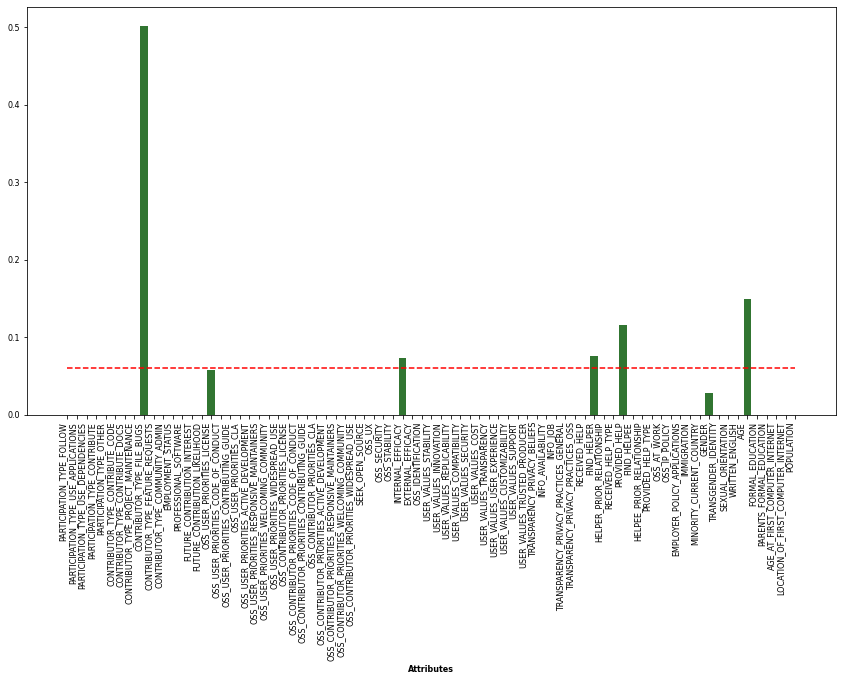

In [9]:
# plotting the attribute relavence
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '8'
plt.rcParams["figure.figsize"] = [14.50, 7.50]
#plt.rcParams["figure.autolayout"] = True
x2=len(list(decision_df3.columns.values))
x3 = x1[1:x2-1]

fig, ax = plt.subplots()
print(len(importance))
print(len(x3))
# plotting thresh hold line
ax.plot([0., len(x3)-1], [0.06, 0.06], "k--", color='red')

#plotting bar chart

plt.bar(x3,height= importance,color=(0.1, 0.4, 0.1, 0.9))

plt.setp(ax.xaxis.get_majorticklabels() , rotation=90, ha='right')



plt.xlabel('Attributes', fontweight='bold')
plt.show()

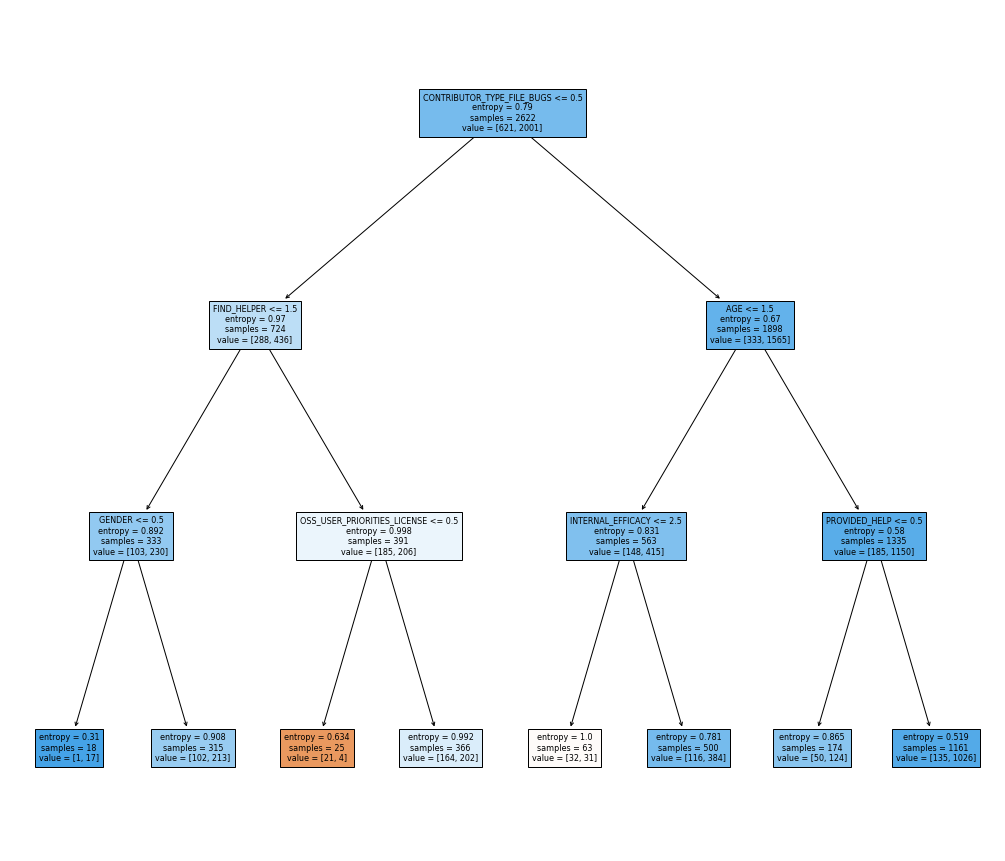

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [9.50, 6.50]
plt.rcParams["figure.autolayout"] = True

plt.figure(figsize=(14,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, feature_names = x3,fontsize=8,filled = True)
plt.show()

In [11]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=list(X_train.columns))
print(r)

|--- CONTRIBUTOR_TYPE_FILE_BUGS <= 0.50
|   |--- FIND_HELPER <= 1.50
|   |   |--- GENDER <= 0.50
|   |   |   |--- class: 1
|   |   |--- GENDER >  0.50
|   |   |   |--- class: 1
|   |--- FIND_HELPER >  1.50
|   |   |--- OSS_USER_PRIORITIES_LICENSE <= 0.50
|   |   |   |--- class: 0
|   |   |--- OSS_USER_PRIORITIES_LICENSE >  0.50
|   |   |   |--- class: 1
|--- CONTRIBUTOR_TYPE_FILE_BUGS >  0.50
|   |--- AGE <= 1.50
|   |   |--- INTERNAL_EFFICACY <= 2.50
|   |   |   |--- class: 0
|   |   |--- INTERNAL_EFFICACY >  2.50
|   |   |   |--- class: 1
|   |--- AGE >  1.50
|   |   |--- PROVIDED_HELP <= 0.50
|   |   |   |--- class: 1
|   |   |--- PROVIDED_HELP >  0.50
|   |   |   |--- class: 1



In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[ 24 255]
 [ 12 833]]
              precision    recall  f1-score   support

           0       0.67      0.09      0.15       279
           1       0.77      0.99      0.86       845

    accuracy                           0.76      1124
   macro avg       0.72      0.54      0.51      1124
weighted avg       0.74      0.76      0.69      1124



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

for i in range(5):
    print('n_estimator = ', i+4)
    clf_2 = RandomForestClassifier(n_estimators=i+4, random_state=23)
    clf_2.fit(X_train,y_train )
    RandomForestClassifier()
    y_rf_pred = clf_2.predict(X_test)
    y_rf_pred
    #RandomForestClassifier()
    accuracy_rf = accuracy_score(y_test, y_rf_pred)
    print('Accuracy = ',accuracy_rf)
    print(classification_report(y_test, y_rf_pred))

n_estimator =  4
Accuracy =  0.6779359430604982
              precision    recall  f1-score   support

           0       0.36      0.37      0.36       279
           1       0.79      0.78      0.78       845

    accuracy                           0.68      1124
   macro avg       0.57      0.57      0.57      1124
weighted avg       0.68      0.68      0.68      1124

n_estimator =  5
Accuracy =  0.7250889679715302
              precision    recall  f1-score   support

           0       0.41      0.24      0.31       279
           1       0.78      0.88      0.83       845

    accuracy                           0.73      1124
   macro avg       0.59      0.56      0.57      1124
weighted avg       0.69      0.73      0.70      1124

n_estimator =  6
Accuracy =  0.7117437722419929
              precision    recall  f1-score   support

           0       0.40      0.32      0.35       279
           1       0.79      0.84      0.81       845

    accuracy                          